# Name : Tharindu O.K.D
# Index No. : 190622R

## Question 01

x = -2.4003994283530288 f(x) = -53.11840483760499
x = 2.5104174088324025 f(x) = -9.073558171240812


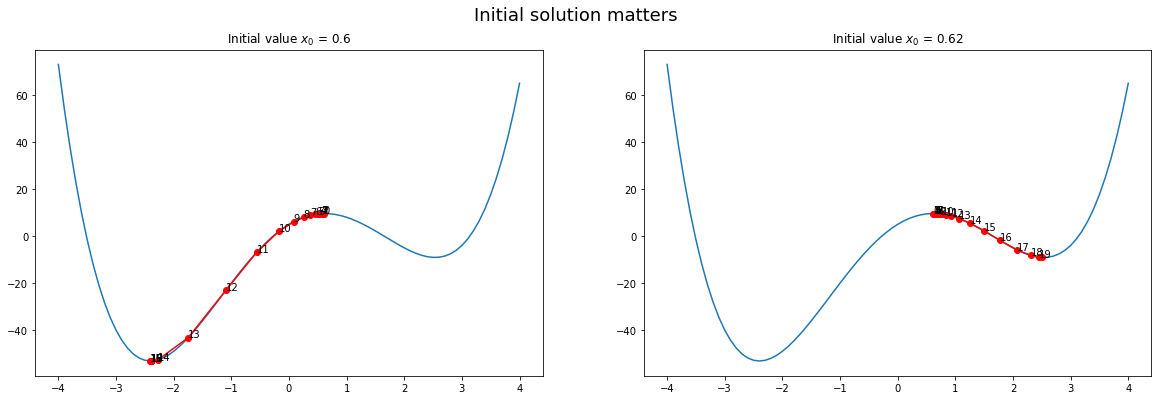

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)], axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w)-1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)], axis=0)

X = [0.6, 0.62]
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Initial solution matters", fontsize=18)
for j, x in enumerate(X):
    alpha = 0.02
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist= np.append(x_hist, x)
        fx_hist= np.append(fx_hist, f(x))

    print('x =', x, 'f(x) =', f(x))

    delta = 0.1
    x_ = np.arange(-4,4+delta,delta)
    ax[j].plot(x_,f(x_))
    ax[j].plot(x_hist,fx_hist, '-o', c='r')
    for k in range(20):
        ax[j].annotate(k, (x_hist[k],fx_hist[k]))
ax[0].set_title(r"Initial value $x_0$ = {}".format(X[0]))
ax[1].set_title(r"Initial value $x_0$ = {}".format(X[1]))
plt.show()

We can see from the above two graph, even if the initial value is slightly changed, gradient decent may converge to local minimum rather than gloabal minimum.

x = -0.5450177615789938 f(x) = -6.489668944441849
x = -2.4003994283530288 f(x) = -53.11840483760499
x = -0.29497479850285213 f(x) = -0.43550699945570187


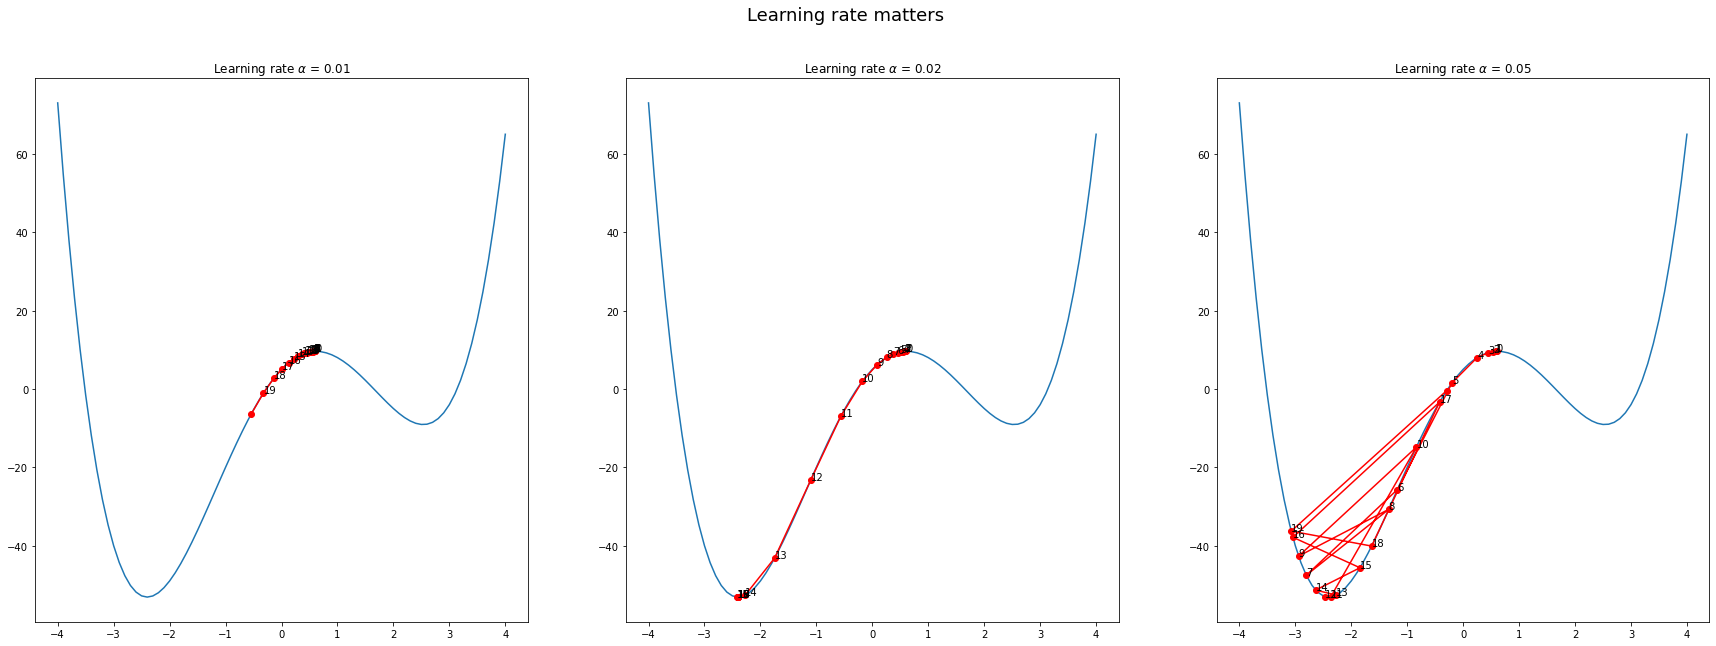

In [36]:
A = [0.01, 0.02, 0.05]
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle("Learning rate matters", fontsize=18)
for j, alpha in enumerate(A):
    x = 0.6
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist= np.append(x_hist, x)
        fx_hist= np.append(fx_hist, f(x))

    print('x =', x, 'f(x) =', f(x))

    delta = 0.1
    x_ = np.arange(-4,4+delta,delta)
    ax[j].plot(x_,f(x_))
    ax[j].plot(x_hist,fx_hist,'-o', c='r')
    for k in range(20):
        ax[j].annotate(k, (x_hist[k],fx_hist[k]), fontsize=10)
ax[0].set_title(r"Learning rate $\alpha$ = {}".format(A[0]))
ax[1].set_title(r"Learning rate $\alpha$ = {}".format(A[1]))
ax[2].set_title(r"Learning rate $\alpha$ = {}".format(A[2]))
plt.show()

We can see from above 3 graph, $\alpha = 0.01$ is not enough,  $\alpha = 0.02$ is just fine, and  $\alpha = 0.05$ is too much therefore it fails to converge to minimum value.

In [37]:
# this is for finding root and the minimum value of of f(x)
from scipy.optimize import fsolve
from scipy.optimize import minimize
x0 = 0.7
root = fsolve(g, x0)
print("Root of f(x) =", root[0])

minimum = minimize(f, x0)
print(minimum)

Root of f(x) = 0.6165450091375104
      fun: -9.083837308516003
 hess_inv: array([[0.02625725]])
      jac: array([-7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([2.53385793])


## Question 02

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10 , mnist

( x_train , y_train ),( x_test , y_test ) = cifar10.load_data ( )
# ( x_train , y_train ) , ( x_test , y_test ) = mnist . load_data ( )
print("x_train -> ", x_train.shape)

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr), :]
x_test = x_test [range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test [range(Nte)]

K = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train, (Ntr, Din))
x_test = np.reshape(x_test, (Nte, Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255.
x_test /= 255.


x_train ->  (50000, 32, 32, 3)


In [39]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)


Iteration 0 / 11: loss 0.813424
Iteration 5 / 11: loss 0.802897
Iteration 10 / 11: loss 0.804664


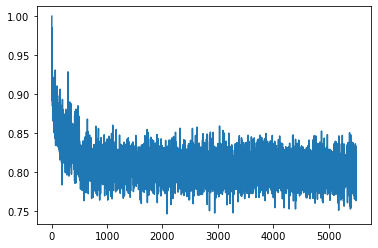

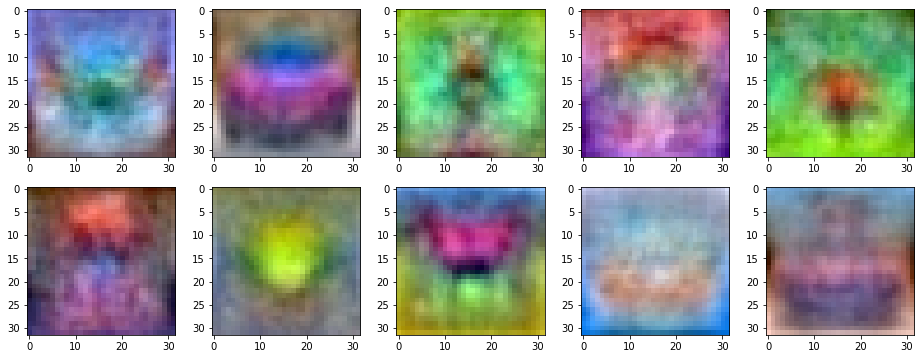

train_acc =  0.39574
test_acc =  0.3878


In [40]:
std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 100
loss_hist = []
rng = np.random.default_rng(seed = 0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        #forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred - y).sum() 
        loss_hist.append(loss)

        #backward pass
        dy_pred = 1./batch_size*2.0*(y_pred - y)
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w - lr*dw #dw is daba L/daba w
        b = b - lr*db

    if e % 5 == 0:
        print("Iteration %d / %d: loss %f"%(e, epochs, loss))
    if e % 10 == 0:
        lr *= lr_decay

y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_hist, w, showim=True)